In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('final_df1.csv')

In [2]:
df.sample(10)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3454,0.756733,0.299806,0.483130,0.672831,0.496049,0.638075,0.528373,0.476560,0.142332,1.0
8643,0.425094,0.228124,0.295705,0.587871,0.749442,0.000000,0.767404,0.856665,1.000000,0.0
2233,0.329713,0.911899,1.000000,0.538648,0.532401,0.088627,0.260632,0.886540,0.204231,1.0
7334,0.609323,0.408426,0.048740,0.578951,0.934214,0.841174,0.350419,0.915288,0.755357,0.0
14580,0.521195,0.496286,0.410599,0.403629,0.675421,0.435038,0.271342,0.763410,0.604065,0.0
5575,0.295545,0.265626,0.457840,0.566970,0.649711,0.379320,0.843086,0.744980,0.607218,1.0
4949,0.090333,1.000000,0.243961,0.595814,0.401956,0.507298,0.849410,0.413526,0.505273,1.0
10080,0.205324,0.830111,0.064324,0.615309,0.160609,0.696256,0.373067,0.864730,0.000000,0.0
1232,0.451706,0.287547,1.000000,0.000000,0.054024,0.039874,0.649936,0.616215,0.196432,1.0
2917,0.229984,0.153296,0.312641,0.555963,1.000000,0.039697,0.346497,0.339881,0.819453,1.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               15000 non-null  float64
 1   Hardness         15000 non-null  float64
 2   Solids           15000 non-null  float64
 3   Chloramines      15000 non-null  float64
 4   Sulfate          15000 non-null  float64
 5   Conductivity     15000 non-null  float64
 6   Organic_carbon   15000 non-null  float64
 7   Trihalomethanes  15000 non-null  float64
 8   Turbidity        15000 non-null  float64
 9   Potability       15000 non-null  float64
dtypes: float64(10)
memory usage: 1.1 MB


### Model Preprocessing

In [29]:
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score

In [6]:
# Separate features and target
X = df.drop('Potability', axis=1) 
y = df['Potability']

In [7]:
# Initialize K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

### Model Training

In [8]:
def evaluate_metrics(X_train, X_test, y_train, y_test):
    models = {
        "REG": LogisticRegression(),
        "SVC": SVC(),
        "DTC": DecisionTreeClassifier(),
        "RFC": RandomForestClassifier(),
        "GBC": GradientBoostingClassifier(),
        "ABC": AdaBoostClassifier(),
        "KNC": KNeighborsClassifier()
    }
    
    metrics = {
        "accuracy": [],
        "precision": [],
        "recall": [],
        "f1": []
    }
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        metrics["accuracy"].append(accuracy_score(y_test, y_pred))
        metrics["precision"].append(precision_score(y_test, y_pred, average='weighted'))
        metrics["recall"].append(recall_score(y_test, y_pred, average='weighted'))
        metrics["f1"].append(f1_score(y_test, y_pred, average='weighted'))
    
    return metrics

In [9]:
# Create a DataFrame to store results
scores = pd.DataFrame(columns=["REG", "SVC", "DTC", "RFC", "GBC", "ABC", "KNC"],
                      index=["ACC", "PREC", "REC", "F1"])

In [10]:
# Loop through each K-Fold split
for train_index, test_index in kf.split(X):
    # Train-test split
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Evaluate models on scaled data
    metrics_scaled = evaluate_metrics(X_train, X_test, y_train, y_test)
    
    # Append metrics to scores DataFrame
    scores.loc['ACC'] = metrics_scaled['accuracy']
    scores.loc['PREC'] = metrics_scaled['precision']
    scores.loc['REC'] = metrics_scaled['recall']
    scores.loc['F1'] = metrics_scaled['f1']

# Print the scores DataFrame
print(scores)

           REG       SVC       DTC       RFC       GBC       ABC       KNC
ACC   0.624667  0.781667     0.995  0.995667      0.76     0.657  0.887333
PREC  0.615443  0.781879  0.995018  0.995673  0.769818  0.640985  0.888148
REC   0.624667  0.781667     0.995  0.995667      0.76     0.657  0.887333
F1    0.483451  0.773295  0.995003  0.995664  0.741924  0.622185  0.887636


### Applying Random Forest Classifier

In [13]:
# Separate features and target
X = df.drop('Potability', axis=1) 
y = df['Potability']

In [14]:
# Initialize K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [15]:
# Define the Random Forest model (the base model)
rf_base = RandomForestClassifier(random_state=42)

In [16]:
# Define the hyperparameters grid for Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],            # Different numbers of trees
    'max_depth': [10, 20, None],               # Limit depth of each tree
    'min_samples_leaf': [2, 4, 6],             # Minimum samples per leaf node
    'max_features': ['sqrt', 'log2', None],    # Different feature selection strategies
    'bootstrap': [True, False]                 # Use bootstrap sampling or not
}

In [17]:
# Initialize Grid Search CV
grid_search = GridSearchCV(estimator=rf_base, param_grid=param_grid, 
                           cv=kf, n_jobs=-1, verbose=2, scoring='accuracy')

# Perform Grid Search with Cross-Validation
grid_search.fit(X, y)

Fitting 5 folds for each of 162 candidates, totalling 810 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'max_features': ['sqrt', 'log2', None],
                         'min_samples_leaf': [2, 4, 6],
                         'n_estimators': [50, 100, 200]},
             scoring='accuracy', verbose=2)

In [18]:
# Print the best hyperparameters from Grid Search
print("Best Hyperparameters found:")
print(grid_search.best_params_)

Best Hyperparameters found:
{'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'n_estimators': 100}


In [19]:
# Train the best model found by Grid Search
best_model = grid_search.best_estimator_

### Model Evaluation

In [46]:
# Evaluate model performance on cross-validation splits
results = pd.DataFrame(columns=["Fold", "Accuracy", "Precision", "Recall", "F1-Score", "ROC_AUC"])

In [47]:
y_test_list = []  # To store y_test for each fold
y_pred_list = []  # To store y_pred for each fold
y_pred_prob_list = []  # To store y_pred_prob for each fold

In [49]:
# Initialize the fold count
fold = 1

# Loop through each K-Fold split
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    # Train the best model on this fold
    best_model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = best_model.predict(X_test)
    y_pred_prob = best_model.predict_proba(X_test)[:, 1]
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    auc = roc_auc_score(y_test, y_pred_prob)
    
    # Store the test and predicted values for later plotting
    y_test_list.append(y_test)
    y_pred_list.append(y_pred)
    y_pred_prob_list.append(y_pred_prob)
    
    # Create a DataFrame for the current fold's results
    fold_results = pd.DataFrame({
        "Fold": [fold],
        "Accuracy": [accuracy],
        "Precision": [precision],
        "Recall": [recall],
        "F1-Score": [f1],
        "ROC_AUC": [auc]
    })
    
    # Append the fold's results to the overall results DataFrame
    results = pd.concat([results, fold_results], ignore_index=True)
    
    # Increment fold count
    fold += 1
    
#Print the results for each fold
print(results)

  Fold  Accuracy  Precision    Recall  F1-Score   ROC_AUC
0    1  0.988667   0.988726  0.988667  0.988651  0.999459
1    2  0.989667   0.989731  0.989667  0.989647  0.999604
2    3  0.990667   0.990705  0.990667  0.990657  0.999472
3    4  0.993000   0.993009  0.993000  0.992995  0.999585
4    5  0.996333   0.996334  0.996333  0.996332  0.999942


In [50]:
#df.drop(df.index, inplace=True)  # Removes all rows but keeps columns
#df = pd.DataFrame()  # Resets the DataFrame to an empty DataFrame

In [51]:
results.to_csv('rf_model_evaluation_scores.csv', index=False)
print("Saved.")

Saved.


In [52]:
evaluation_df = pd.read_csv('rf_model_evaluation_scores.csv')
evaluation_df

,Fold,Accuracy,Precision,Recall,F1-Score,ROC_AUC
0,1,0.988667,0.988726,0.988667,0.988651,0.999459
1,2,0.989667,0.989731,0.989667,0.989647,0.999604
2,3,0.990667,0.990705,0.990667,0.990657,0.999472
3,4,0.993000,0.993009,0.993000,0.992995,0.999585
4,5,0.996333,0.996334,0.996333,0.996332,0.999942


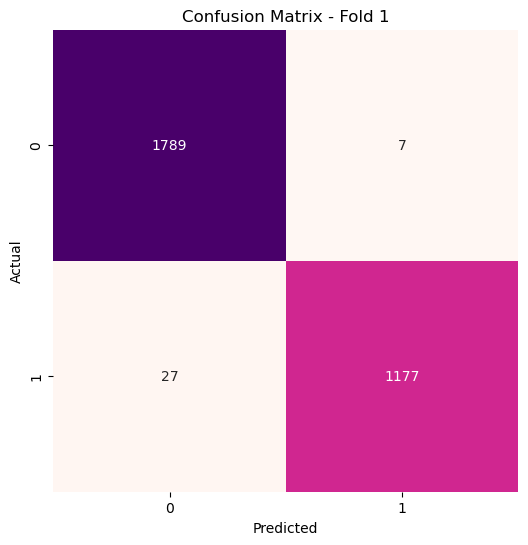

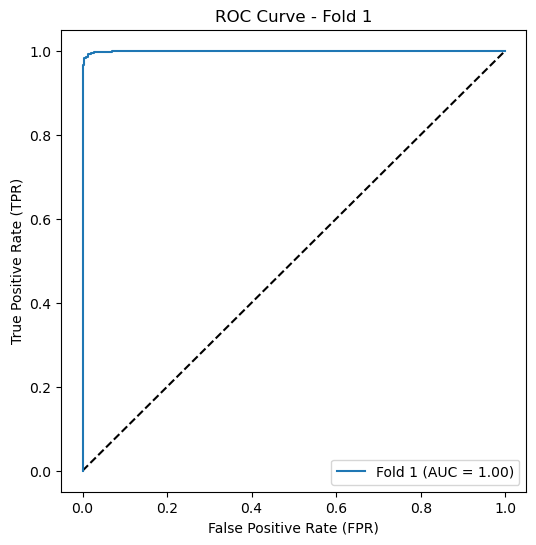

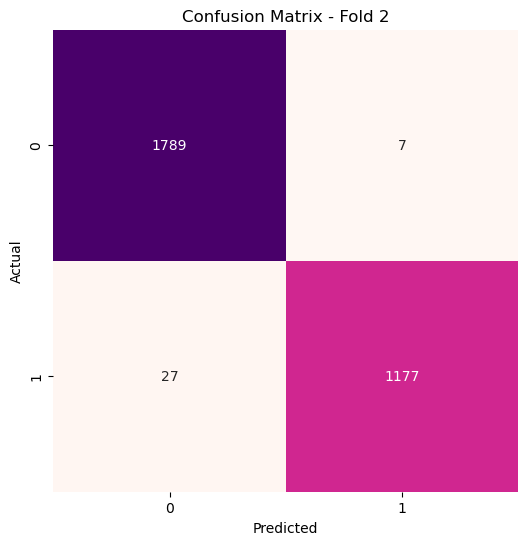

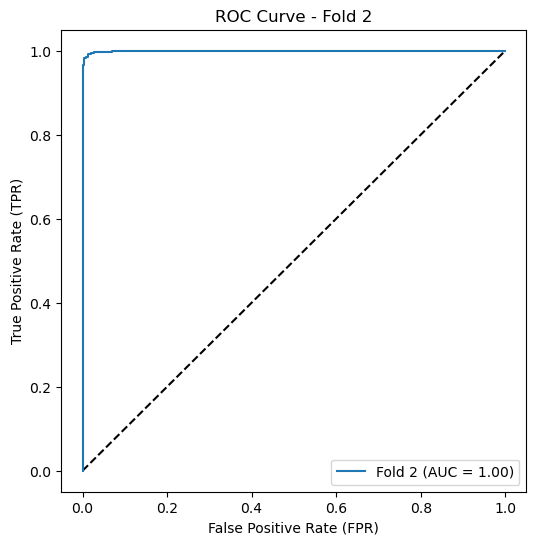

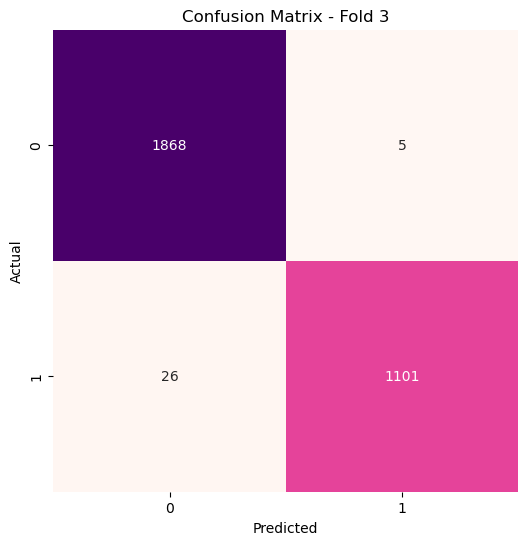

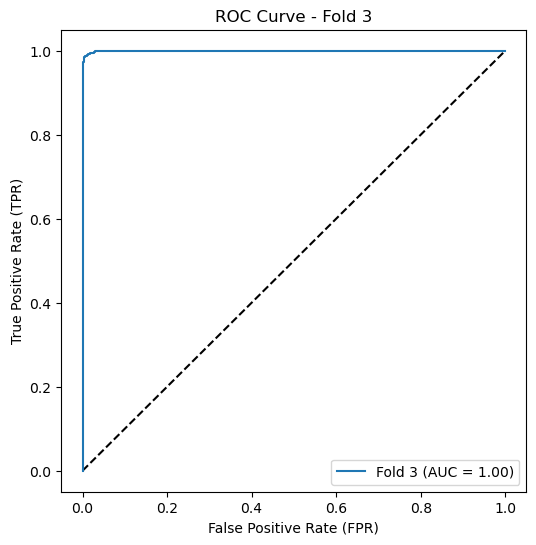

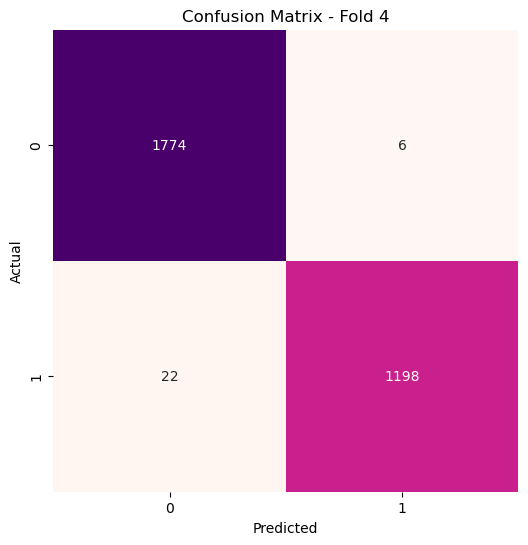

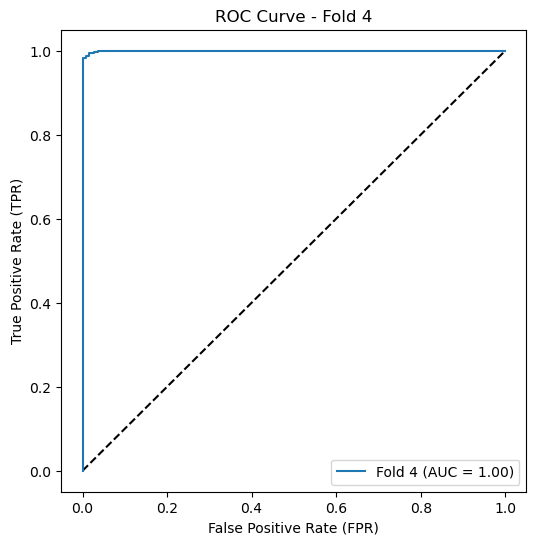

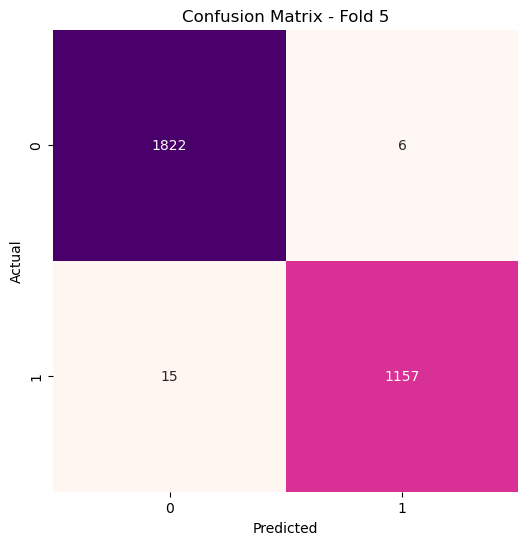

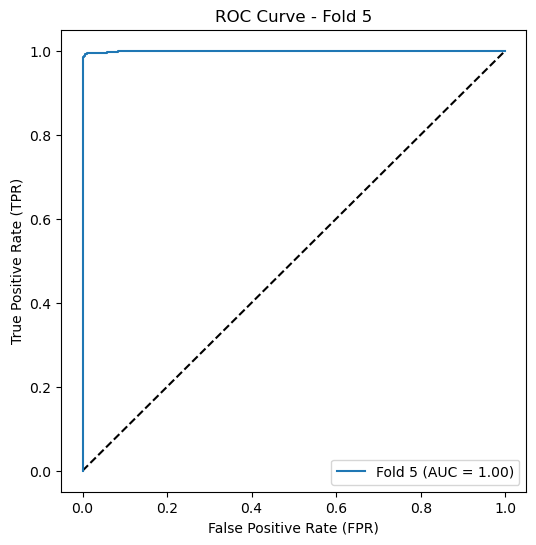

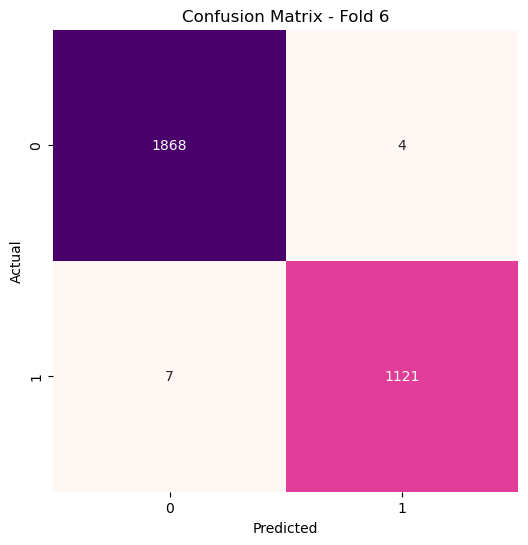

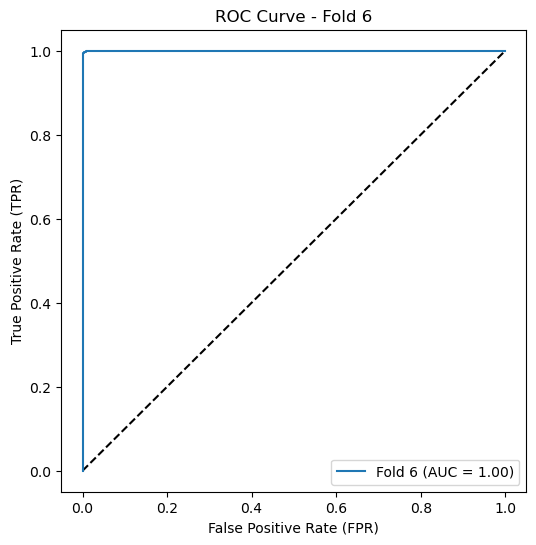

In [53]:
# Initialize the fold count again for plotting
fold = 1

# Loop through each fold and plot the confusion matrix and ROC curve
for y_test, y_pred, y_pred_prob in zip(y_test_list, y_pred_list, y_pred_prob_list):
    
    # Confusion Matrix Heatmap
    plt.figure(figsize=(6, 6))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, cmap='RdPu', annot=True, fmt='d', cbar=False)
    plt.title(f'Confusion Matrix - Fold {fold}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC Curve
    plt.figure(figsize=(6, 6))
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(fpr, tpr, label=f"Fold {fold} (AUC = {auc:.2f})")
    plt.xlabel("False Positive Rate (FPR)")
    plt.ylabel("True Positive Rate (TPR)")
    plt.title(f'ROC Curve - Fold {fold}')
    plt.legend(loc="lower right")
    plt.show()

    # Increment fold count
    fold += 1

In [ ]:
'''import pandas as pd
import numpy as np

# Assume df is your original DataFrame
# df = pd.read_csv('your_data.csv')  # Load your data if it's not already in a DataFrame

# Define the number of records to select
num_records = 250

# Ensure reproducibility
random_state = 42

# Select 250 random records
np.random.seed(random_state)  # For reproducibility
indices = np.random.choice(df.index, size=num_records, replace=False)

# Create a copy of the DataFrame to modify
df_copy = df.copy()

# Convert Potability from 0 to 1 for the selected records
df_copy.loc[indices, 'Potability'] = df_copy.loc[indices, 'Potability'].apply(lambda x: 1 if x == 0 else x)

# Get remaining indices for the next selection
remaining_indices = df.index.difference(indices)

# Select another 250 random records from the remaining indices
indices_to_convert = np.random.choice(remaining_indices, size=num_records, replace=False)

# Convert Potability from 1 to 0 for these selected records
df_copy.loc[indices_to_convert, 'Potability'] = df_copy.loc[indices_to_convert, 'Potability'].apply(lambda x: 0 if x == 1 else x)

# Now df_copy has the updated Potability values
print(df_copy.head())'''
